#YouTube Trending Videos Analysis with Python

###Importing the necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json

###The dataset contains data on trending videos for each day. It contains data on over 40,000 trending videos.

In [ ]:
df = pd.read_csv('INvideos.csv')
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style = "ticks")
plt.rc('figure', figsize = (8, 5), dpi = 100)
plt.rc('axes', labelpad = 20, facecolor = "#ffffff", linewidth = 0.4, grid = True, labelsize = 14)
plt.rc('patch', linewidth = 0)
plt.rc('xtick.major', width = 0.2)
plt.rc('ytick.major', width = 0.2)
plt.rc('grid', color = '#9e9e9e', linewidth = 0.4)
plt.rc('font', family = 'Arial', weight = '400', size = 10)
plt.rc('text', color = '#282828')
plt.rc('savefig', pad_inches = 0.3, dpi = 300)

###The description column has some null values. To do some data Cleaning and to get rid of those null values, let's put an empty string in place of each null value in Description Column.

In [ ]:
df['description'] = df['description'].fillna(value = "")

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


###Observation from above table:
1. The average number of views of a trending video is 1,060,477. The median value of the number of views is 304,586, which means that half of the trending videos have less than this number and the other half have views greater than this number.
2. The average number of likes for a trending video is 27,082, while the average number of dislikes is 1665.
3. The average number of comments is 2,677 while the median is 329.

#Data Visualization

###Now we want to see how many trending video titles have at least one uppercase word (eg WHAT). To do this, we’ll add a new variable to the dataset whose value is True if the video title contains at least one uppercase word, and False otherwise.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


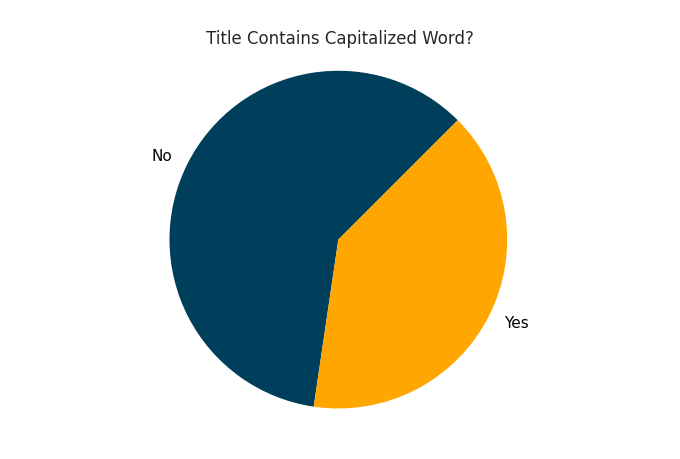

In [ ]:
def contains_capitalized_word(s):
  for w in s.split():
    if w.isupper():
      return True
  return False

df['contains_capitalized'] = df['title'].apply(contains_capitalized_word)

value_counts = df['contains_capitalized'].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors = ['#003f5c', '#ffa600'], textprops = {'color' : '#040204'}, startangle = 45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

###We can see that 44% of trending video titles contain at least one word in all caps. We will use our added variable later to analyze the correlation between the variables.

###Let’s add another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


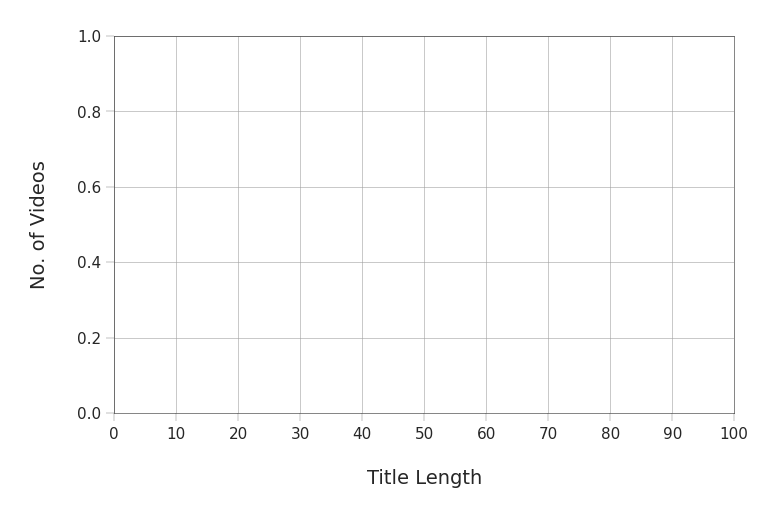

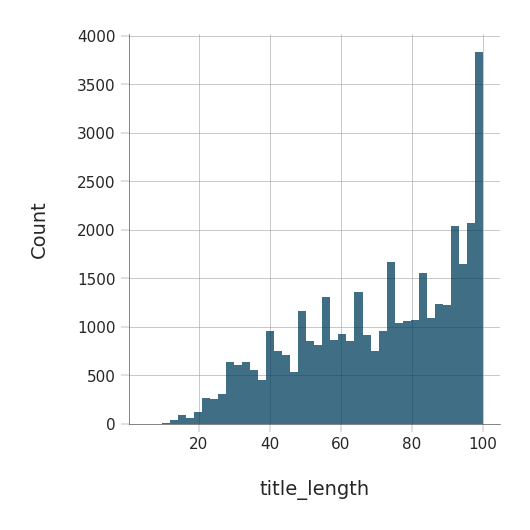

In [ ]:
df['title_length'] = df['title'].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.displot(df['title_length'], kde = False, rug = False, color = PLOT_COLORS[4], ax = ax)
_ = ax.set(xlabel = "Title Length", ylabel = "No. of Videos", xticks = range(0, 110, 10))

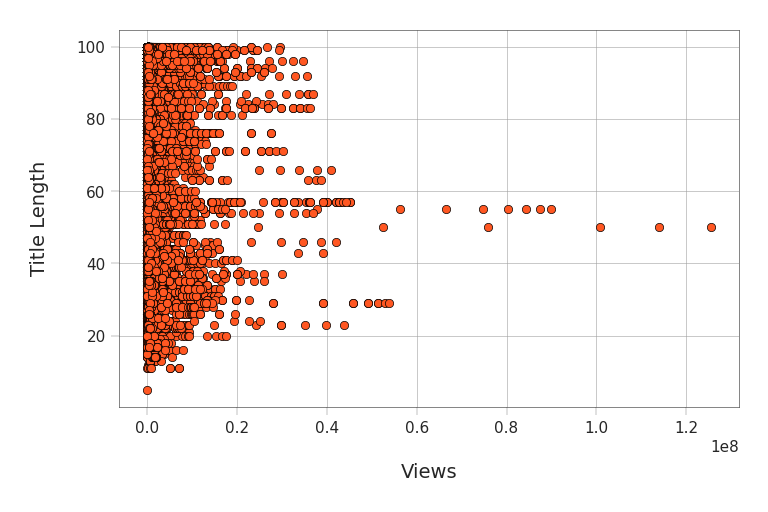

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

###Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 30 and 60 characters or so.

#YouTube Trending Videos Analysis: Correlation

###Now let’s see how the variables in the dataset correlate to each other: for example, we would like to see how views and likes correlate, meaning that views and likes increase and decrease together:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


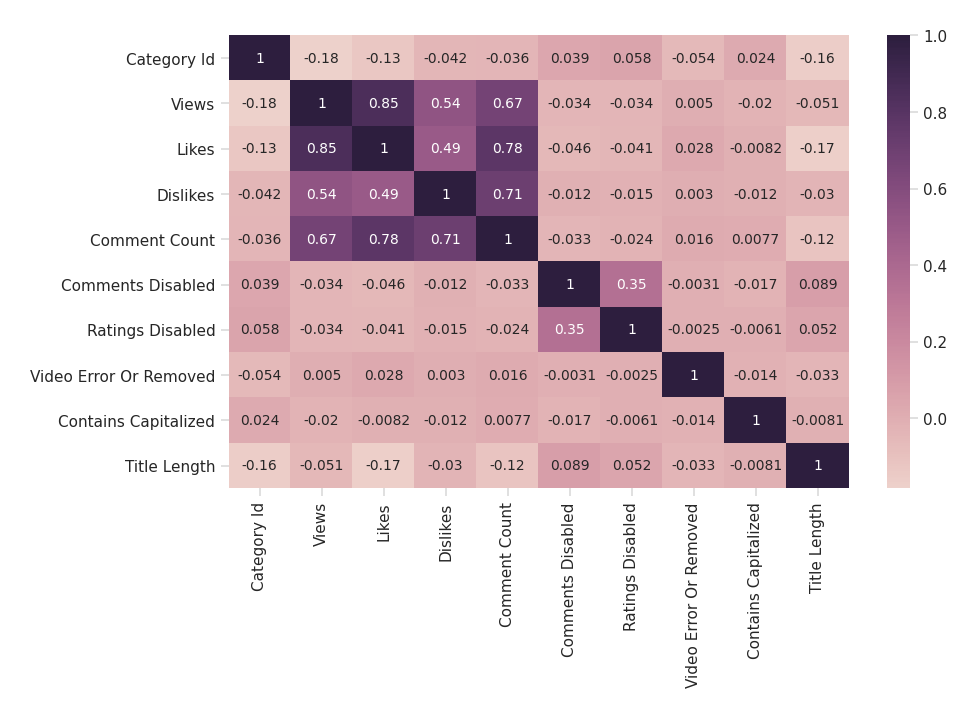

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

###The correlation map and correlation table above indicate that views and likes are strongly positively correlated.

###Let’s see if some words are used meaningfully in trending video titles. Let’s draw a word cloud for the titles of our trending videos, which is a way to visualize the most common words in the titles; the more common the word, the larger its font-size

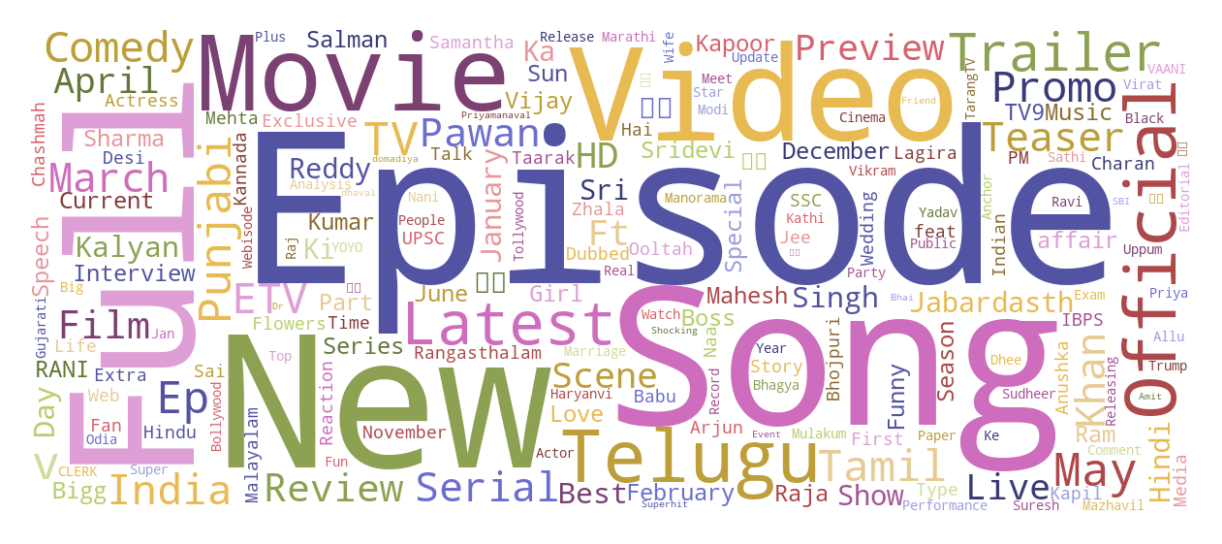

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")